In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


In [2]:
# purpose of this notebook is to compare the enriched TFs based on secRecon human genes (n=1127) using 3 methods
## 1. IPA upstream regulator analysis (adj pvalue < 0.05)
## 2. Lund et al. secretory reconstruction -- known to contain TFs and also non-TFs; TFs were excluded from secRecon manual curation
## 3. results from ChEA3 TF enrichment tool (webapi)

In [81]:
# [1] import IPA results
## this is the upstream regulator table exported after inputing N=1127 human secRecon genes (HGCN symbol and entrez considered)
## under IPA project "Jasmine_secRecon/Analyses/JT_secrecon_hu_genes"

ipa = pd.read_csv('upstream_regulator_secrecon_hu_genes_20240711.txt',
                 sep='\t',header=1)
ipa = ipa[ipa['Molecule Type'] == 'transcription regulator']
ipa

,Upstream Regulator,Molecule Type,p-value of overlap,Target Molecules in Dataset,Mechanistic Network
1,XBP1,transcription regulator,5.990000e-98,"ALG12,ALG2,ARCN1,ARFGAP1,ARFGAP3,ATF4,ATF6,ATF...",217 (7)
8,NRF1,transcription regulator,1.420000e-23,"MOGS,POMP,PSMA2,PSMA3,PSMA4,PSMA5,PSMA6,PSMA7,...",
16,HSF2,transcription regulator,2.590000e-16,"CCT2,CCT3,CCT4,CCT5,CCT6A,CCT7,CCT8,HSPA1A/HSP...",
21,HTT,transcription regulator,3.380000e-15,"AKT1,AKT2,AP1S1,ARHGEF7,ATP2A2,B3GALT1,B3GALT5...",420 (12)
25,NFE2L2,transcription regulator,2.240000e-14,"AGAP1,ARF1,ARHGAP5,ATF4,ATF6,ATG7,B4GALNT1,BCL...",232 (5)
...,...,...,...,...,...
1055,GMEB2,transcription regulator,4.280000e-02,ADRM1,
1134,FOS,transcription regulator,4.450000e-02,"AP3D1,ARF1,ARPC5,ASAP1,B4GALT1,BCL2,BCL2L11,CA...",
1135,TFEC,transcription regulator,4.540000e-02,"ATP2A1,IGF1R,PSMA6",
1146,MYOCD,transcription regulator,4.820000e-02,"ATF4,ATP2A2,CASQ2,DDIT3,EIF2A,EIF2AK3,TP53,XBP1",


In [4]:
# import genes in GO MF term GO:0003700 DNA-binding transcription factor activity
## https://www.informatics.jax.org/go/term/GO:0003700
## n=3795 genes
go_mf_tf = pd.read_csv('GO_term_summary_0003700_20240711_235418.txt',sep='\t')
go_mf_tf

# get genes
go_tf = [i.upper() for i in set(go_mf_tf['MGI Gene/Marker ID'])]
go_tf

['ZFP534',
 'FOXN2',
 'ZFP977',
 'ZFP738',
 'ZFP12',
 'ZFA-PS',
 'ESRRB',
 'ENO1B',
 'ZFP354C',
 'PATZ1',
 'SOHLH1',
 'PRRX2',
 'DMBX1',
 'TBR1',
 'FOXA1',
 'STAT2',
 'FIGLA',
 'ZIC3',
 'ZFP266',
 'BCL11A',
 'ZFP950',
 'NKX2-1',
 'NKX2-5',
 'GATA1',
 'ZFP983',
 'TFAP4',
 'ZFY2',
 'ZFP719',
 'TGIF2LX1',
 'ZFP709',
 'ASCL5',
 '2610021A01RIK',
 'ZFP846',
 'E2F1',
 'MYCS',
 'RFX5',
 'IRX1',
 'NR1H5',
 'ZIC2',
 'ZFP92',
 'ZFP825',
 'FOXR2',
 'ZFP442',
 'ELF3',
 'PEG3',
 'HOXA11',
 'ESRRA',
 'MAX',
 'ZFP429',
 'GBX1',
 'HOXC9',
 'ZFP455',
 'MXD3',
 'NFIL3',
 'ZFP131',
 'MRTFA',
 'SOX12',
 'ZFP513',
 'NFE2L2',
 'TSHZ2',
 'ZFP329',
 'NKX2-2',
 'NFATC2',
 'ZFP617',
 'FOXC1',
 'CREBL2',
 'ZFP59',
 'ZKSCAN3',
 'NEUROG1',
 'ZFP663',
 'ZSCAN21',
 'SMAD4',
 'MIXL1',
 'OLIG3',
 'NOTCH4',
 'MEF2BL',
 'POU5F1',
 'SOX3',
 'ZBTB22',
 'ALX1',
 'ZBTB32',
 'ZBTB45',
 'MYOG',
 'ARNT2',
 'LBX1',
 'GPER1',
 'ZBTB3',
 'ZSCAN4F',
 'MYCN',
 'FOS',
 'ZFP976',
 'ZFP169',
 'SNAI2',
 'OVOL3',
 'ELK4',
 'FOXN3',
 'RHO

In [5]:
# [2] import Lund recon which includes TF andn on TF genes
lund = pd.read_excel('Lund_secRecon.xlsx')
lund

/Users/jasminetat/opt/anaconda3/envs/secseq/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Symbol,MM_UniprotID,ProteinName,MM_GeneName,MM_GeneAlias,CHO_GeneID,CHO_GeneName,Feature
0,14-3-3 BETA/ALPHA,Q9CQV8,14-3-3 protein beta/alpha (Protein kinase C in...,Ywhab,Ywhab,100757122.0,LOC100757122,retrograde transport; protein transport
1,14-3-3 EPSILON,P62259,14-3-3 protein epsilon (14-3-3E),Ywhae,Ywhae,100753603.0,LOC100753603,retrograde transport; protein transport
2,14-3-3 ETA,P68510,14-3-3 protein eta,Ywhah,Ywhah,100771398.0,LOC100771398,retrograde transport; protein transport
3,14-3-3 GAMMA,P61982,14-3-3 protein gamma [Cleaved into: 14-3-3 pro...,Ywhag,Ywhag,100764051.0,LOC100764051,retrograde transport; protein transport
4,14-3-3 SIGMA,O70456,14-3-3 protein sigma (Stratifin),Sfn,Sfn Mkrn3,100769890.0,LOC100769890,retrograde transport; protein transport
...,...,...,...,...,...,...,...,...
802,XIAP,Q60989,E3 ubiquitin-protein ligase XIAP (EC 6.3.2.-) ...,Xiap,Xiap Aipa Api3 Birc4 Miha,100689374.0,Xiap,ubl conjugation pathway; apoptosis;
803,XTP3B,Q8VEH8,Endoplasmic reticulum lectin 1 (ER lectin) (Er...,Erlec1,Erlec1,100767274.0,LOC100767274,erad
804,YKT6,Q9CQW1,Synaptobrevin homolog YKT6 (EC 2.3.1.-),Ykt6,Ykt6,100763402.0,LOC100763402,protein transport; r-snare; secretory granule;...
805,YOD1,Q8CB27,Ubiquitin thioesterase OTU1 (EC 3.4.19.12),Yod1,Yod1,100773294.0,LOC100773294,ubl conjugation pathway; erad; upr; deubiquity...


In [6]:
# [3] import ChEA3 results
## open question -- how to set a threshold/cutoff for top ranked enriched TFs
## "rank" here is the overall rank of the TF, also the Fisher's exact p-value
## "score" is the mean rank (the mean rank or p-value compared to all 1632 TFs)

ch = pd.read_csv('Integrated_meanRank.tsv', sep='\t')
ch

,Query Name,Rank,TF,Score,Library,Overlapping_Genes
0,gene_set_query,1,GLMP,6.00,"ARCHS4 Coexpression,9;GTEx Coexpression,3","SLC35B2,KDELR1,PLOD3,TXNDC12,PLOD1,PSMD8,PSMD9..."
1,gene_set_query,2,ZNF888,19.00,"GTEx Coexpression,19","SLC35B3,SLC35B2,COPB2,TRAM1,PIGO,PIGN,COPB1,FA..."
2,gene_set_query,3,XBP1,23.00,"ARCHS4 Coexpression,7;Enrichr Queries,15;ReMap...","DPAGT1,ERO1A,ERO1B,GALNT11,RASEF,AUP1,PLOD1,PS..."
3,gene_set_query,4,PREB,28.00,"ARCHS4 Coexpression,2;Enrichr Queries,1;GTEx C...","SLC35B2,UBE2D4,SLC35B1,ARAF,AUP1,PSMD8,PSMD4,P..."
4,gene_set_query,5,CREB3L2,31.33,"ARCHS4 Coexpression,3;Enrichr Queries,62;GTEx ...","RAB3B,ERO1B,CHPF,KDELR1,PLOD3,PLOD2,GXYLT2,PLO..."
...,...,...,...,...,...,...
1627,gene_set_query,1628,HSFX2,1539.00,"ARCHS4 Coexpression,1539","CALR3,NAT8B,USP6,UBQLNL,DNAJB8,UBQLN3"
1628,gene_set_query,1629,NKX11,1561.00,"ARCHS4 Coexpression,1575;GTEx Coexpression,1546","CHST8,RAB3B,GGA1,CALR3,RASEF,AP3D1,ALG14,HS3ST..."
1629,gene_set_query,1630,ARID3C,1599.00,"ARCHS4 Coexpression,1621;GTEx Coexpression,1577","NEU4,EXOC3L4,CHST13,GPLD1"
1630,gene_set_query,1631,ZNF735,1602.00,"ARCHS4 Coexpression,1623;GTEx Coexpression,1581","UBB,UBR7,VPS33A,SIAH1,AP1M1"


(array([ 54., 139., 232., 256., 267., 271., 192., 128.,  80.,  13.]),
 array([   6. ,  166.6,  327.2,  487.8,  648.4,  809. ,  969.6, 1130.2,
        1290.8, 1451.4, 1612. ]),
 <BarContainer object of 10 artists>)

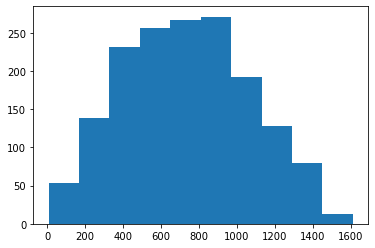

In [7]:
plt.hist(ch['Score'])

In [87]:
# temp store dict of datasets
tf_list = {}

tf_list['lund'] = set(lund['Symbol']) # 806 potential TFs (tot genes including non-TFs)
tf_list['chea'] = set(ch['TF']) # 1632 # all genes in ChEA3
tf_list['chea_top100'] = set(ch.iloc[:100]['TF']) # top 200 TFs enriched in ChEA3
tf_list['GO'] = set(go_tf) # 1350 # all genes in GO_MF term
tf_list['IPA'] = set([i for i in ipa['Upstream Regulator'] if i.isupper() == True]) # 85 that are actually genes enriched for secrecon genes

[print(len(tf_list[i])) for i in [*tf_list]]

806
1632
100
1350
85


[None, None, None, None, None]

In [88]:
# store final TF lists in this dict
tf_final = {}
tf_final['IPA'] = tf_list['IPA'] # store list of IPA upstream reg as is
tf_final['ChEA3'] = tf_list['chea_top100'] # top 200 TF based on ChEA3

In [89]:
# check which genes in Lund are TFs based on GO_MF and ChEA3 and add to final list
len(tf_list['GO'] & tf_list['lund']) # 36 in common for Lund and GO-MF term
len(tf_list['lund'] & tf_list['chea']) # 36 in common for Lund vs ChEA3

### find unique genes
len((tf_list['GO'] & tf_list['lund']) & (tf_list['lund'] & tf_list['chea'])) # 35 - what's different
(tf_list['GO'] & tf_list['lund']) - (tf_list['lund'] & tf_list['chea']) # CREBRF
(tf_list['lund'] & tf_list['chea']) - (tf_list['GO'] & tf_list['lund']) # TBP


# final TF in Lund geneset ## n=37 genes
tf_final['Lund'] = set(list(tf_list['GO'] & tf_list['lund']) + ['CREBRF','TBP'])
len(set(tf_final['Lund']))

37

In [90]:
[(i,len(tf_final[i])) for i in [*tf_final]]

[('IPA', 85), ('ChEA3', 100), ('Lund', 37)]

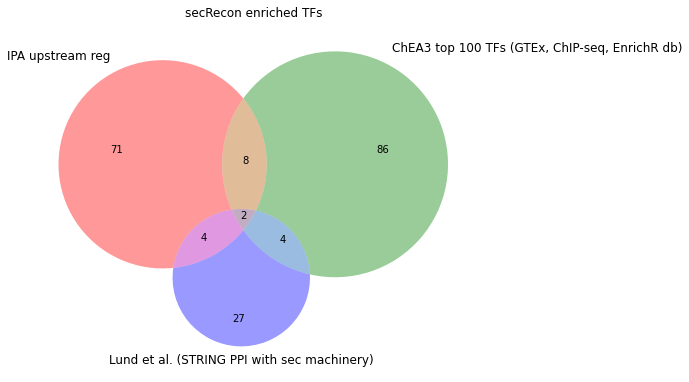

In [92]:
fig, ax = plt.subplots(figsize=(8,8))
set1 = set(tf_final['IPA'])
set2 = set(tf_final['ChEA3'])
set3 = set(tf_final['Lund'])

venn3([set1, set2, set3], ('IPA upstream reg', 'ChEA3 top 100 TFs (GTEx, ChIP-seq, EnrichR db)', 'Lund et al. (STRING PPI with sec machinery)'))

plt.title('secRecon enriched TFs')
# plt.figsize(10,10)
plt.show()

In [93]:
set1 & set2 & set3

{'ATF6B', 'XBP1'}

In [96]:
(set2 & set3) - set1

{'ATF1', 'ATF2', 'JUND', 'MAFG'}

In [98]:
(set3 & set1) - set2

{'ATF4', 'CREB3', 'HSF1', 'NRF1'}

In [95]:
(set1 & set2) - set3, set3 - (set1 & set2)

({'ATF6', 'BHLHA15', 'CLOCK', 'CREB3L2', 'ELK1', 'HSF2', 'NFE2L1', 'NFYB'},
 {'ATF1',
  'ATF2',
  'ATF3',
  'ATF4',
  'ATF5',
  'ATF7',
  'BATF2',
  'BATF3',
  'CEBPA',
  'CEBPB',
  'CEBPD',
  'CREB3',
  'CREBRF',
  'DBP',
  'FOSB',
  'FOSL2',
  'FOXO1',
  'HLF',
  'HSF1',
  'JUN',
  'JUNB',
  'JUND',
  'MAF',
  'MAFA',
  'MAFB',
  'MAFF',
  'MAFG',
  'MAFK',
  'NFKB1',
  'NFKB2',
  'NRF1',
  'SRF',
  'STAT1',
  'TBP',
  'YY1'})

In [100]:
ipa

,Upstream Regulator,Molecule Type,p-value of overlap,Target Molecules in Dataset,Mechanistic Network
1,XBP1,transcription regulator,5.990000e-98,"ALG12,ALG2,ARCN1,ARFGAP1,ARFGAP3,ATF4,ATF6,ATF...",217 (7)
8,NRF1,transcription regulator,1.420000e-23,"MOGS,POMP,PSMA2,PSMA3,PSMA4,PSMA5,PSMA6,PSMA7,...",
16,HSF2,transcription regulator,2.590000e-16,"CCT2,CCT3,CCT4,CCT5,CCT6A,CCT7,CCT8,HSPA1A/HSP...",
21,HTT,transcription regulator,3.380000e-15,"AKT1,AKT2,AP1S1,ARHGEF7,ATP2A2,B3GALT1,B3GALT5...",420 (12)
25,NFE2L2,transcription regulator,2.240000e-14,"AGAP1,ARF1,ARHGAP5,ATF4,ATF6,ATG7,B4GALNT1,BCL...",232 (5)
...,...,...,...,...,...
1055,GMEB2,transcription regulator,4.280000e-02,ADRM1,
1134,FOS,transcription regulator,4.450000e-02,"AP3D1,ARF1,ARPC5,ASAP1,B4GALT1,BCL2,BCL2L11,CA...",
1135,TFEC,transcription regulator,4.540000e-02,"ATP2A1,IGF1R,PSMA6",
1146,MYOCD,transcription regulator,4.820000e-02,"ATF4,ATP2A2,CASQ2,DDIT3,EIF2A,EIF2AK3,TP53,XBP1",


In [30]:
lund

,Symbol,MM_UniprotID,ProteinName,MM_GeneName,MM_GeneAlias,CHO_GeneID,CHO_GeneName,Feature
0,14-3-3 BETA/ALPHA,Q9CQV8,14-3-3 protein beta/alpha (Protein kinase C in...,Ywhab,Ywhab,100757122.0,LOC100757122,retrograde transport; protein transport
1,14-3-3 EPSILON,P62259,14-3-3 protein epsilon (14-3-3E),Ywhae,Ywhae,100753603.0,LOC100753603,retrograde transport; protein transport
2,14-3-3 ETA,P68510,14-3-3 protein eta,Ywhah,Ywhah,100771398.0,LOC100771398,retrograde transport; protein transport
3,14-3-3 GAMMA,P61982,14-3-3 protein gamma [Cleaved into: 14-3-3 pro...,Ywhag,Ywhag,100764051.0,LOC100764051,retrograde transport; protein transport
4,14-3-3 SIGMA,O70456,14-3-3 protein sigma (Stratifin),Sfn,Sfn Mkrn3,100769890.0,LOC100769890,retrograde transport; protein transport
...,...,...,...,...,...,...,...,...
802,XIAP,Q60989,E3 ubiquitin-protein ligase XIAP (EC 6.3.2.-) ...,Xiap,Xiap Aipa Api3 Birc4 Miha,100689374.0,Xiap,ubl conjugation pathway; apoptosis;
803,XTP3B,Q8VEH8,Endoplasmic reticulum lectin 1 (ER lectin) (Er...,Erlec1,Erlec1,100767274.0,LOC100767274,erad
804,YKT6,Q9CQW1,Synaptobrevin homolog YKT6 (EC 2.3.1.-),Ykt6,Ykt6,100763402.0,LOC100763402,protein transport; r-snare; secretory granule;...
805,YOD1,Q8CB27,Ubiquitin thioesterase OTU1 (EC 3.4.19.12),Yod1,Yod1,100773294.0,LOC100773294,ubl conjugation pathway; erad; upr; deubiquity...


In [99]:
ch[ch['TF'].isin(list(set2 - (set1 & set3)))].shape

(98, 6)

In [104]:
# export these lists to an excel sheet
export_file = {}

# get all enriched results
export_file['IPA_results_85-TF'] = ipa[ipa['Upstream Regulator'].isin(list(tf_final['IPA']))]
export_file['Lund_results_38-TF'] = lund[lund['Symbol'].isin(list(tf_final['Lund']))]
export_file['ChEA3_results_100-TF'] = ch[ch['TF'].isin(list(tf_final['ChEA3']))]

# get uniq per set
export_file['IPA_unique_84-TF'] = ipa[ipa['Upstream Regulator'].isin(list(set1 - (set2 & set3)))]
export_file['Lund_unique_36-TF'] = lund[lund['Symbol'].isin(list(set3 - (set1 & set2)))]
export_file['ChEA3_unique_98-TF'] = ch[ch['TF'].isin(list(set2 - (set1 & set3)))]

# get intersecting genes with default IPA format 
export_file['all_intersect_IPAinfo_2-TF'] = ipa[ipa['Upstream Regulator'].isin(list(set1 & set2 & set3))]
export_file['IPA_Lund_IPAinfo_4-TF'] = ipa[ipa['Upstream Regulator'].isin(list((set1 & set3) - set2))]
export_file['IPA_ChEA3_IPAinfo_8-TF'] = ipa[ipa['Upstream Regulator'].isin(list((set1 & set2) - set3))]

# get intersecting genes with default chea format
export_file['ChEA3_Lund_ChEA3info_4-TF'] = ch[ch['TF'].isin(list((set3 & set2) - set1))]

In [105]:
[(i, export_file[i].shape) for i in [*export_file]]

[('IPA_results_85-TF', (85, 5)),
 ('Lund_results_38-TF', (38, 8)),
 ('ChEA3_results_100-TF', (100, 6)),
 ('IPA_unique_84-TF', (83, 5)),
 ('Lund_unique_36-TF', (36, 8)),
 ('ChEA3_unique_98-TF', (98, 6)),
 ('all_intersect_IPAinfo_2-TF', (2, 5)),
 ('IPA_Lund_IPAinfo_4-TF', (4, 5)),
 ('IPA_ChEA3_IPAinfo_8-TF', (8, 5)),
 ('ChEA3_Lund_ChEA3info_4-TF', (4, 6))]

In [106]:
# write individual tables into xlsx
writer=pd.ExcelWriter("TF_secrecon_lists.xlsx") 
for key in [*export_file]:
    export_file[key].to_excel(writer,sheet_name=key)

writer.save()
writer.close()

/var/folders/bm/jsmvb47d0nn6z2lrn12ymbvm0000gn/T/ipykernel_94454/481587860.py:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
